In [154]:
import numpy as np
import pandas as pd

In [155]:
df_training = pd.read_csv('train.csv')
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0,bendemeer,kallang,central region,2100


### Primary schools by location analysis

In [156]:
df_schools = pd.read_csv('auxiliary-data/sg-primary-schools.csv')
df_schools.head()

,name,latitude,longitude
0,Admiralty Primary School,1.454038,103.817436
1,Ahmad Ibrahim Primary School,1.433153,103.832942
2,Ai Tong School,1.360583,103.833020
3,Alexandra Primary School,1.291334,103.824425
4,Anchor Green Primary School,1.390370,103.887165


In [157]:
gep_schools = ["Anglo-Chinese School (Primary)", "Catholic High School (Primary)", "Henry Park Primary School",
              "Nan Hua Primary School", "Nanyang Primary School", "Raffles Girls' Primary School", "Rosyth School",
              "St. Hilda's Primary School", "Tao Nan School"]

In [158]:
df_schools.loc[df_schools["name"].isin(gep_schools)]

,name,latitude,longitude
7,Anglo-Chinese School (Primary),1.318371,103.835610
22,Catholic High School (Primary),1.354389,103.844211
67,Henry Park Primary School,1.316676,103.784296
96,Nan Hua Primary School,1.319202,103.761095
97,Nanyang Primary School,1.320847,103.807750
127,Raffles Girls' Primary School,1.329404,103.806443
132,Rosyth School,1.372891,103.875001
146,St. Hilda's Primary School,1.349609,103.936104
153,Tao Nan School,1.294332,103.849026


In [159]:
import geopandas as gpd
from shapely.geometry import Point

In [160]:
geom_list_training = [Point(lon,lat) for lon,lat in zip(df_training["longitude"], df_training["latitude"])]
gdf_training = gpd.GeoDataFrame(df_training, geometry=geom_list_training, crs="EPSG:4326")
# this uses the right projection to get the distance in m scale
gdf_training.to_crs(epsg=3414, inplace=True)
gdf_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,geometry
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0,yuhua east,jurong east,west region,1600,POINT (17462.227 36295.695)
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0,bedok north,bedok,east region,2250,POINT (39729.720 34710.924)
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0,toa payoh central,toa payoh,central region,1900,POINT (29371.591 34938.088)
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0,pasir ris drive,pasir ris,east region,2850,POINT (42420.207 39139.923)
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0,bendemeer,kallang,central region,2100,POINT (31341.233 33639.906)


#### Find number of schools in radius (500m)

In [161]:
geom_list_schools = [Point(lon,lat) for lon,lat in zip(df_schools["longitude"], df_schools["latitude"])]
gdf_schools = gpd.GeoDataFrame(df_schools, geometry=geom_list_schools, crs="EPSG:4326")
# this uses the right projection to get the distance in m scale
gdf_schools.to_crs(epsg=3414, inplace=True)
gdf_schools.head()

,name,latitude,longitude,geometry
0,Admiralty Primary School,1.454038,103.817436,POINT (26232.547 48405.700)
1,Ahmad Ibrahim Primary School,1.433153,103.832942,POINT (27958.137 46096.263)
2,Ai Tong School,1.360583,103.833020,POINT (27966.805 38071.919)
3,Alexandra Primary School,1.291334,103.824425,POINT (27010.188 30414.717)
4,Anchor Green Primary School,1.390370,103.887165,POINT (33992.449 41365.633)


In [162]:
gdf_schools.crs

<Projected CRS: EPSG:3414>
Name: SVY21 / Singapore TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Singapore - onshore and offshore.
- bounds: (103.59, 1.13, 104.07, 1.47)
Coordinate Operation:
- name: Singapore Transverse Mercator
- method: Transverse Mercator
Datum: SVY21
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [163]:
from sklearn.neighbors import BallTree

In [164]:
sch_coords = np.array(gdf_schools.geometry.apply(lambda point: (point.x, point.y)).tolist())
training_coords = np.array(gdf_training.geometry.apply(lambda point: (point.x, point.y)).tolist())
sch_tree = BallTree(sch_coords, leaf_size=20)  # Adjust leaf_size as needed

### Find the best distance radius, given by the correlation between it and monthly rent

In [165]:
lower_limit = 500
upper_limit = 10000

df_training_loop = df_training.copy()
sch_corrs = []
for i in range(lower_limit, upper_limit, 500):
    count_within_radius = sch_tree.query_radius(training_coords, r=i, count_only=True)
    print("Radius in metres:", i)
    df_training_loop[f'pri_schs_within_{i}m'] = count_within_radius
    corr = df_training_loop[f'pri_schs_within_{i}m'].corr(df_training['monthly_rent']) 
    sch_corrs.append(corr)
    print(corr)

Radius in metres: 500
-0.026595057424408097
Radius in metres: 1000
-0.02930073276416583
Radius in metres: 1500
-0.014303825396584815
Radius in metres: 2000
-0.023003579598185
Radius in metres: 2500
-0.014056621384929783
Radius in metres: 3000
-0.024483275188624795
Radius in metres: 3500
-0.03567429608095254
Radius in metres: 4000
-0.04908426421435611
Radius in metres: 4500
-0.05756070128858662
Radius in metres: 5000
-0.0627152875692786
Radius in metres: 5500
-0.06400460872222438
Radius in metres: 6000
-0.06558617973951648
Radius in metres: 6500
-0.06364528589681752
Radius in metres: 7000
-0.06051180186299039
Radius in metres: 7500
-0.05579301689300221
Radius in metres: 8000
-0.05480345627001646
Radius in metres: 8500
-0.049953402901066736
Radius in metres: 9000
-0.04655905401053344
Radius in metres: 9500
-0.04499120983832066


In [166]:
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0,bendemeer,kallang,central region,2100


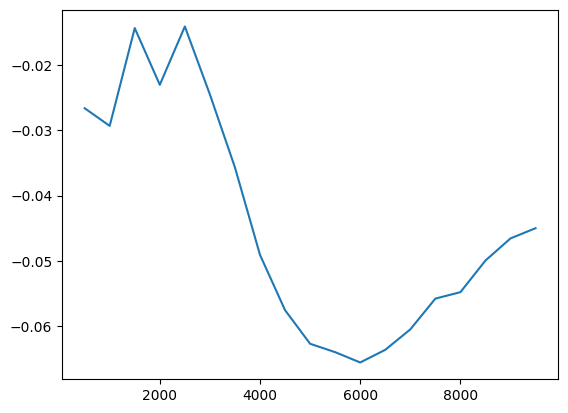

In [167]:
import matplotlib.pyplot as plt
plt.plot(range(lower_limit, upper_limit, 500), sch_corrs)

### Find number of GEP schools in radius

In [168]:
df_gep_schools = df_schools[df_schools["name"].isin(gep_schools)]

In [169]:
geom_list_gep = [Point(lon,lat) for lon,lat in zip(df_gep_schools["longitude"], df_gep_schools["latitude"])]
gdf_gep_schools = gpd.GeoDataFrame(df_gep_schools, geometry=geom_list_gep, crs="EPSG:4326")
# this uses the right projection to get the distance in m scale
gdf_gep_schools.to_crs(epsg=3414, inplace=True)
gdf_gep_schools.head()

,name,latitude,longitude,geometry
7,Anglo-Chinese School (Primary),1.318371,103.835610,POINT (28254.979 33404.234)
22,Catholic High School (Primary),1.354389,103.844211,POINT (29212.169 37386.949)
67,Henry Park Primary School,1.316676,103.784296,POINT (22544.284 33216.965)
96,Nan Hua Primary School,1.319202,103.761095,POINT (19962.234 33496.244)
97,Nanyang Primary School,1.320847,103.807750,POINT (25154.492 33678.137)


In [170]:
gep_coords = np.array(gdf_gep_schools.geometry.apply(lambda point: (point.x, point.y)).tolist())
training_coords = np.array(gdf_training.geometry.apply(lambda point: (point.x, point.y)).tolist())
gep_tree = BallTree(gep_coords, leaf_size=20)  # Adjust leaf_size as needed

### Find the best distance radius, given by the correlation between it and monthly rent

In [171]:
lower_limit = 500
upper_limit = 10000

df_training_loop = df_training.copy()
gep_corrs = []
for i in range(lower_limit, upper_limit, 500):
    count_within_radius = gep_tree.query_radius(training_coords, r=i, count_only=True)
    print("Radius in metres:", i)
    df_training_loop[f'gep_schs_within_{i}m'] = count_within_radius
    corr = df_training_loop[f'gep_schs_within_{i}m'].corr(df_training['monthly_rent'])
    gep_corrs.append(corr)
    print(corr)

Radius in metres: 500
0.024104302230654046
Radius in metres: 1000
0.0399683929291329
Radius in metres: 1500
0.039936661589027034
Radius in metres: 2000
0.018797663043330467
Radius in metres: 2500
0.027820110610981583
Radius in metres: 3000
0.03787820790944738
Radius in metres: 3500
0.05053436150775315
Radius in metres: 4000
0.09067597560218328
Radius in metres: 4500
0.09970657174763652
Radius in metres: 5000
0.1015567486614832
Radius in metres: 5500
0.0952773443103802
Radius in metres: 6000
0.08325079748870172
Radius in metres: 6500
0.08006328257034365
Radius in metres: 7000
0.080212296150106
Radius in metres: 7500
0.08338527234279655
Radius in metres: 8000
0.0859169396598177
Radius in metres: 8500
0.07947860350027915
Radius in metres: 9000
0.06724901720128225
Radius in metres: 9500
0.05752710488401993


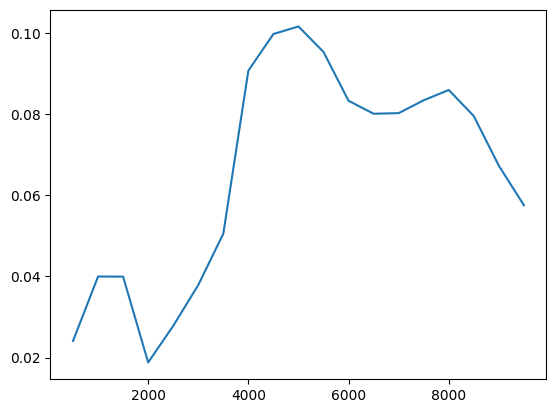

In [172]:
plt.plot(range(lower_limit, upper_limit, 500), gep_corrs)

### We decide to use number of pri schs at 6km (strong negative correlation), number of GEP schs at 5km (strong positive correlation)

In [173]:
radius = 5000  # Adjust the radius as needed

# Perform the query
count_gep_within_radius = gep_tree.query_radius(training_coords, r=radius, count_only=True)
df_training["gep_schools_within_5km"] = count_gep_within_radius
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,gep_schools_within_5km
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0,yuhua east,jurong east,west region,1600,1
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0,bedok north,bedok,east region,2250,1
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0,toa payoh central,toa payoh,central region,1900,5
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0,pasir ris drive,pasir ris,east region,2850,1
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0,bendemeer,kallang,central region,2100,3


In [174]:
radius = 6000

count_within_radius = sch_tree.query_radius(training_coords, r=radius, count_only=True)
df_training["pri_schools_within_6km"] = count_within_radius
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,gep_schools_within_5km,pri_schools_within_6km
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0,yuhua east,jurong east,west region,1600,1,42
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0,bedok north,bedok,east region,2250,1,36
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0,toa payoh central,toa payoh,central region,1900,5,45
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0,pasir ris drive,pasir ris,east region,2850,1,25
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0,bendemeer,kallang,central region,2100,3,45


### Find the radius distance for number of shopping malls in area

In [175]:
df_malls = pd.read_csv('auxiliary-data/sg-shopping-malls.csv')
df_malls.head()

,name,latitude,longitude
0,100 AM,1.274588,103.843471
1,313@Somerset,1.301385,103.837684
2,Aperia,1.310867,103.863930
3,Balestier Hill Shopping Centre,1.325596,103.842572
4,Bugis Cube,1.298141,103.855635


In [176]:
geom_list_malls = [Point(lon,lat) for lon,lat in zip(df_malls["longitude"], df_malls["latitude"])]
gdf_malls = gpd.GeoDataFrame(df_malls, geometry=geom_list_malls, crs="EPSG:4326")

# this uses the right projection to get the distance in m scale
gdf_malls.to_crs(epsg=3414, inplace=True)
gdf_malls.head()

,name,latitude,longitude,geometry
0,100 AM,1.274588,103.843471,POINT (29129.855 28563.012)
1,313@Somerset,1.301385,103.837684,POINT (28485.871 31526.071)
2,Aperia,1.310867,103.863930,POINT (31406.715 32574.521)
3,Balestier Hill Shopping Centre,1.325596,103.842572,POINT (29029.769 34203.184)
4,Bugis Cube,1.298141,103.855635,POINT (30483.657 31167.348)


In [177]:
mall_coords = np.array(gdf_malls.geometry.apply(lambda point: (point.x, point.y)).tolist())
training_coords = np.array(gdf_training.geometry.apply(lambda point: (point.x, point.y)).tolist())
mall_tree = BallTree(mall_coords, leaf_size=20)  # Adjust leaf_size as needed

In [178]:
lower_limit = 500
upper_limit = 10000

df_training_loop = df_training.copy()
mall_corrs = []
for i in range(lower_limit, upper_limit, 500):
    count_within_radius = mall_tree.query_radius(training_coords, r=i, count_only=True)
    print("Radius in metres:", i)
    df_training_loop[f'malls_within_{i}m'] = count_within_radius
    corr = df_training_loop[f'malls_within_{i}m'].corr(df_training_loop['monthly_rent'])
    mall_corrs.append(corr)
    print(corr)

Radius in metres: 500
0.06553006969762983
Radius in metres: 1000
0.061415710042399936
Radius in metres: 1500
0.04983118205503658
Radius in metres: 2000
0.0672531589645068
Radius in metres: 2500
0.10224995483861797
Radius in metres: 3000
0.12557469041424432
Radius in metres: 3500
0.1228937320606789
Radius in metres: 4000
0.11694291881377827
Radius in metres: 4500
0.10035121492833086
Radius in metres: 5000
0.0895102129533178
Radius in metres: 5500
0.0904224290066444
Radius in metres: 6000
0.08695055908905233
Radius in metres: 6500
0.08112220124100492
Radius in metres: 7000
0.07453035419270296
Radius in metres: 7500
0.07026468627933667
Radius in metres: 8000
0.06706177181642473
Radius in metres: 8500
0.05899534604262011
Radius in metres: 9000
0.05358574894737051
Radius in metres: 9500
0.04548951485363782


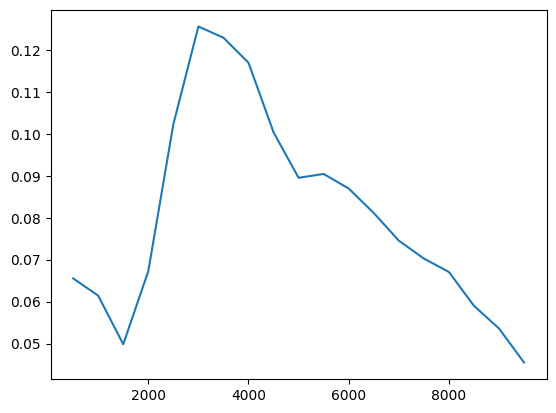

In [179]:
plt.plot(range(lower_limit, upper_limit, 500), mall_corrs)

### We decide to use number of malls at 3km (strong positive correlation)

In [180]:
radius = 3000

count_within_radius = mall_tree.query_radius(training_coords, r=radius, count_only=True)
df_training["malls_within_3km"] = count_within_radius
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,gep_schools_within_5km,pri_schools_within_6km,malls_within_3km
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0,yuhua east,jurong east,west region,1600,1,42,7
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0,bedok north,bedok,east region,2250,1,36,9
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0,toa payoh central,toa payoh,central region,1900,5,45,13
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0,pasir ris drive,pasir ris,east region,2850,1,25,6
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0,bendemeer,kallang,central region,2100,3,45,22


### First, find correlation between distance to nearest MRT and monthly rent

In [181]:
df_mrt = pd.read_csv('auxiliary-data/sg-mrt-existing-stations.csv')
df_mrt.head()

,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


In [182]:
geom_list_mrt = [Point(lon,lat) for lon,lat in zip(df_mrt["longitude"], df_mrt["latitude"])]
gdf_mrt = gpd.GeoDataFrame(df_mrt, geometry=geom_list_mrt, crs="EPSG:4326")

# this uses the right projection to get the distance in m scale
gdf_mrt.to_crs(epsg=3414, inplace=True)
gdf_mrt.head()

,code,name,opening_year,latitude,longitude,geometry
0,NS1,Jurong East,1990,1.333295,103.742154,POINT (17854.318 35054.699)
1,NS2,Bukit Batok,1990,1.349035,103.749526,POINT (18674.821 36795.151)
2,NS3,Bukit Gombak,1990,1.358663,103.751913,POINT (18940.536 37859.689)
3,NS4,Choa Chu Kang,1990,1.385363,103.744371,POINT (18101.247 40812.122)
4,NS5,Yew Tee,1996,1.397476,103.747418,POINT (18440.441 42151.480)


In [183]:
mrt_coords = np.array(gdf_mrt.geometry.apply(lambda point: (point.x, point.y)).tolist())
mrt_tree = BallTree(mrt_coords, leaf_size=20)  # Adjust leaf_size as needed

In [184]:
mrt_distance, _ = mrt_tree.query(training_coords, k=1)  # k=1 for finding the nearest point
df_training['nearest_distance_to_mrt'] = mrt_distance
print(df_training['nearest_distance_to_mrt'].corr(df_training['monthly_rent']))

-0.06717153500878162


### This correlation is pretty large, so we will keep it

### Find the radius distance for number of MRT stations in area

In [185]:
lower_limit = 500
upper_limit = 10000

df_training_loop = df_training.copy()
mrt_corrs = []
for i in range(lower_limit, upper_limit, 500):
    count_within_radius = mrt_tree.query_radius(training_coords, r=i, count_only=True)
    print("Radius in metres:", i)
    df_training_loop[f'mrt_within_{i}m'] = count_within_radius
    corr = df_training_loop[f'mrt_within_{i}m'].corr(df_training_loop['monthly_rent'])
    mrt_corrs.append(corr)
    print(corr)

Radius in metres: 500
0.10278995320192615
Radius in metres: 1000
0.0898019170039885
Radius in metres: 1500
0.0843927228362451
Radius in metres: 2000
0.09248829676436827
Radius in metres: 2500
0.09763385562560442
Radius in metres: 3000
0.10571352877630827
Radius in metres: 3500
0.1055441023231389
Radius in metres: 4000
0.10509153359787221
Radius in metres: 4500
0.09910900786532169
Radius in metres: 5000
0.0951979041996949
Radius in metres: 5500
0.09193988884188559
Radius in metres: 6000
0.08826993419317916
Radius in metres: 6500
0.085664776357758
Radius in metres: 7000
0.08031139300996716
Radius in metres: 7500
0.07749895174324894
Radius in metres: 8000
0.07921964640258554
Radius in metres: 8500
0.07691878692899956
Radius in metres: 9000
0.07339992869872006
Radius in metres: 9500
0.0680575845485591


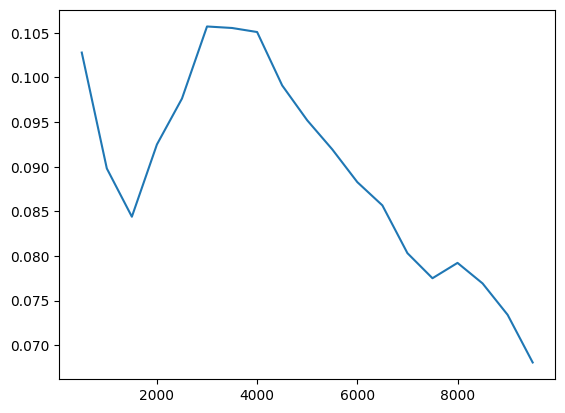

In [186]:
plt.plot(range(lower_limit, upper_limit, 500), mrt_corrs)

### Generate Graph of all correlations with radius distances tried

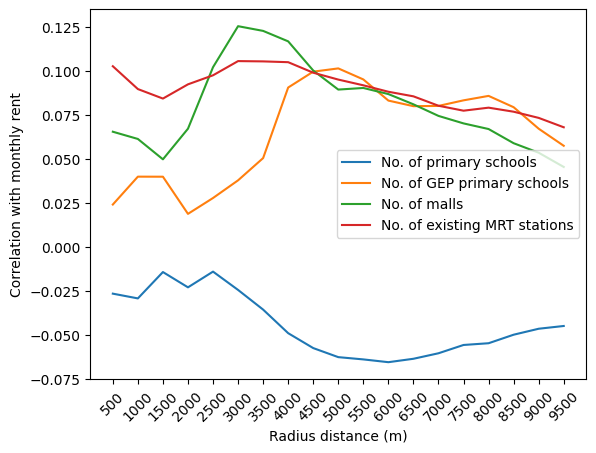

In [220]:
plt.plot(range(lower_limit, upper_limit, 500), sch_corrs, label="No. of primary schools")
plt.plot(range(lower_limit, upper_limit, 500), gep_corrs, label="No. of GEP primary schools")
plt.plot(range(lower_limit, upper_limit, 500), mall_corrs, label="No. of malls")
plt.plot(range(lower_limit, upper_limit, 500), mrt_corrs, label="No. of existing MRT stations")

plt.xlabel("Radius distance (m)")
plt.ylabel("Correlation with monthly rent")
plt.xticks(range(lower_limit, upper_limit, 500), rotation=45)
plt.legend()
# plt.title('Correlation with monthly rent of number of amenities within radius')
plt.savefig('figures/aux-data-radius.png', bbox_inches='tight')

### We will use number of MRT stations within 3km

In [188]:
radius = 3000

count_within_radius = mrt_tree.query_radius(training_coords, r=radius, count_only=True)
df_training["mrts_within_3km"] = count_within_radius
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,elevation,subzone,planning_area,region,monthly_rent,gep_schools_within_5km,pri_schools_within_6km,malls_within_3km,nearest_distance_to_mrt,mrts_within_3km
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,0,yuhua east,jurong east,west region,1600,1,42,7,699.298824,6
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,0,bedok north,bedok,east region,2250,1,36,9,899.079717,11
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,0,toa payoh central,toa payoh,central region,1900,5,45,13,218.796373,20
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,0,pasir ris drive,pasir ris,east region,2850,1,25,6,1547.364292,4
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,0,bendemeer,kallang,central region,2100,3,45,22,187.932631,26


### Get the distance to nearest GEP school

In [189]:
gep_distances, _ = gep_tree.query(training_coords, k=1)  # k=1 for finding the nearest point
df_training['nearest_distance_to_gep'] = gep_distances
print(df_training['nearest_distance_to_gep'].corr(df_training['monthly_rent']))

-0.06845159646188786


### This correlation is pretty large, so we will keep it

### Get distance to nearest pri sch

In [190]:
sch_distances, _ = sch_tree.query(training_coords, k=1)  # k=1 for finding the nearest point
df_training_copy = df_training.copy()
df_training_copy['nearest_distance_to_sch'] = sch_distances
print(df_training_copy['nearest_distance_to_sch'].corr(df_training_copy['monthly_rent']))

0.0017546072892141555


### Get distance to nearest mall

In [191]:
mall_distances, _ = mall_tree.query(training_coords, k=1)  # k=1 for finding the nearest point
df_training_copy = df_training.copy()
df_training_copy['nearest_distance_to_mall'] = mall_distances
print(df_training_copy['nearest_distance_to_mall'].corr(df_training_copy['monthly_rent']))

-0.0711787721240005


### correlation with distance to nearest mall is pretty large, so we will keep it

In [192]:
df_training['nearest_distance_to_mall'] = mall_distances

### Overall correlation diagram

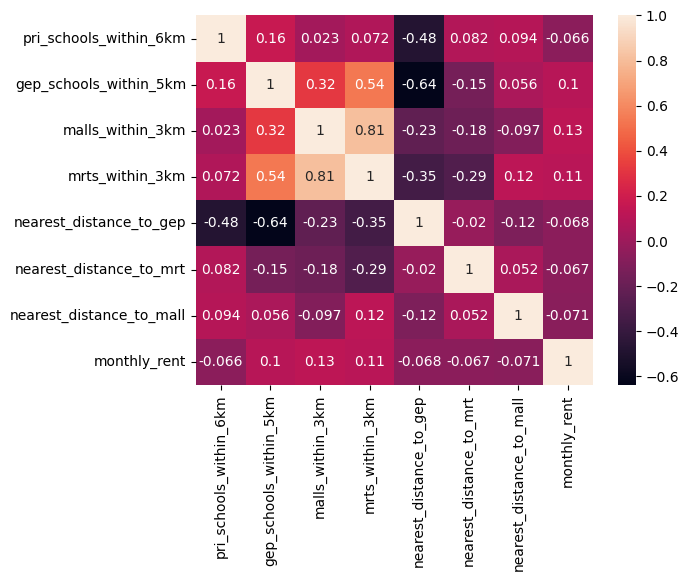

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = df_training[['pri_schools_within_6km', 'gep_schools_within_5km', 
                   'malls_within_3km', 'mrts_within_3km', 
                   'nearest_distance_to_gep', 'nearest_distance_to_mrt',
                   'nearest_distance_to_mall', 'monthly_rent']].corr()

# plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot=True)
plt.savefig("figures/aux-corr-heat-map.png")

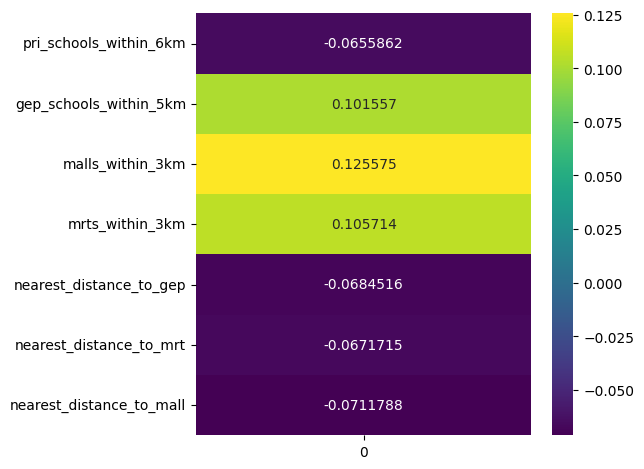

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

df_training_aux = df_training[['pri_schools_within_6km', 'gep_schools_within_5km', 
                   'malls_within_3km', 'mrts_within_3km', 
                   'nearest_distance_to_gep', 'nearest_distance_to_mrt',
                   'nearest_distance_to_mall']]

df_cor = df_training_aux.corrwith(df_training['monthly_rent']).to_frame()

hmap = sns.heatmap(df_cor, annot=True, fmt="g", cmap='viridis')
fig = hmap.get_figure()
plt.tight_layout()
fig.savefig("figures/aux-corr-heat-map.png", bbox_inches='tight') 

# plt.figure(figsize = (10, 6))
# plt.savefig("figures/aux-corr-heat-map.png")

In [43]:
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,planning_area,region,monthly_rent,gep_schools_within_5km,pri_schools_within_6km,malls_within_3km,nearest_distance_to_mrt,mrts_within_3km,nearest_distance_to_gep,nearest_distance_to_mall
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,jurong east,west region,1600,1,42,7,699.298824,6,3753.259361,1197.254807
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,bedok,east region,2250,1,36,9,899.079717,11,2167.360316,1114.363854
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,toa payoh,central region,1900,5,45,13,218.796373,20,1897.242758,468.808277
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,pasir ris,east region,2850,1,25,6,1547.364292,4,3753.937855,400.744149
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,kallang,central region,2100,3,45,22,187.932631,26,3095.238252,1067.395062


### Scratch

In [ ]:
radius = 500  # Adjust the radius as needed

# Perform the query
# count_within_radius = tree.query_radius(training_coords, r=radius, return_distance=True)
count_within_radius = sch_tree.query_radius(training_coords, r=radius, count_only=True)
df_training["pri_schools_within_500m"] = count_within_radius
df_training.head()

total_count = 0
for i in [0, 1, 2, 3, 4, 5]:
    count = df_training.loc[df_training["pri_schools_within_500m"] == i].shape[0]
    print(f"Number of flats with {i} primary school within 500m:", count)
    total_count += count

print(total_count)

In [ ]:
radius = 500  # Adjust the radius as needed

# Perform the query
count_gep_within_radius = gep_tree.query_radius(training_coords, r=radius, count_only=True)
df_training["gep_schools_within_500m"] = count_gep_within_radius
df_training.head()

total_count = 0
for i in [0, 1, 2, 3, 4, 5]:
    count = df_training.loc[df_training["gep_schools_within_500m"] == i].shape[0]
    print(f"Number of flats with {i} GEP primary school within 500m:", count)
    total_count += count

print(total_count)

In [43]:
gep_tree = BallTree(gep_coords, leaf_size=20)  # Adjust leaf_size as needed
radius = 1000  # Adjust the radius as needed

# Perform the query
count_gep_within_radius = gep_tree.query_radius(training_coords, r=radius, count_only=True)
df_training["gep_schools_within_1km"] = count_gep_within_radius
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,elevation,subzone,planning_area,region,monthly_rent,pri_schools_within_500m,gep_schools_wi|thin_500m,gep_schools_within_500m,gep_schools_within_1km,pri_schools_within_1km
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,0,yuhua east,jurong east,west region,1600,1,0,0,0,3
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,0,bedok north,bedok,east region,2250,0,0,0,0,5
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,0,toa payoh central,toa payoh,central region,1900,1,0,0,0,2
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,0,pasir ris drive,pasir ris,east region,2850,0,0,0,0,3
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,0,bendemeer,kallang,central region,2100,1,0,0,0,2


In [45]:
radius = 1000  # Adjust the radius as needed

# Perform the query
# count_within_radius = tree.query_radius(training_coords, r=radius, return_distance=True)
count_within_radius = sch_tree.query_radius(training_coords, r=radius, count_only=True)
df_training["pri_schools_within_1km"] = count_within_radius
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,elevation,subzone,planning_area,region,monthly_rent,pri_schools_within_500m,gep_schools_wi|thin_500m,gep_schools_within_500m,gep_schools_within_1km,pri_schools_within_1km
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,0,yuhua east,jurong east,west region,1600,1,0,0,0,3
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,0,bedok north,bedok,east region,2250,0,0,0,0,5
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,0,toa payoh central,toa payoh,central region,1900,1,0,0,0,2
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,0,pasir ris drive,pasir ris,east region,2850,0,0,0,0,3
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,0,bendemeer,kallang,central region,2100,1,0,0,0,2


In [46]:
c = df_training['pri_schools_within_1km'].corr(df_training['monthly_rent'])
print(c)

-0.02930073276416583


In [47]:
c = df_training['pri_schools_within_500m'].corr(df_training['monthly_rent'])
print(c)

-0.026595057424408097


<Axes: >

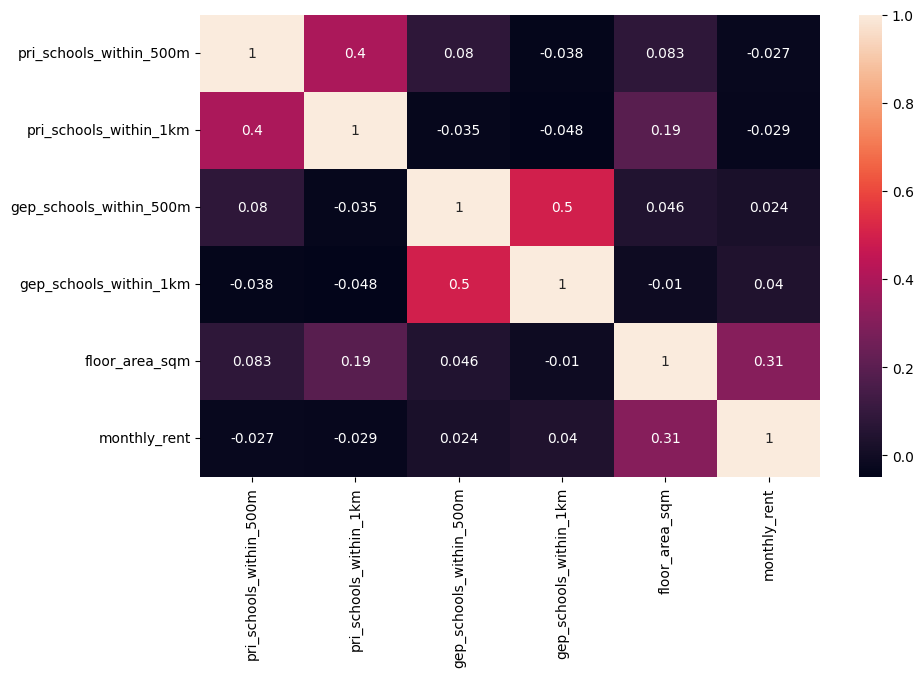

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = df_training[['pri_schools_within_500m', 'pri_schools_within_1km', 
                   'gep_schools_within_500m', 'gep_schools_within_1km', 
                   "floor_area_sqm", "monthly_rent"]].corr()

plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot=True)

<Axes: >

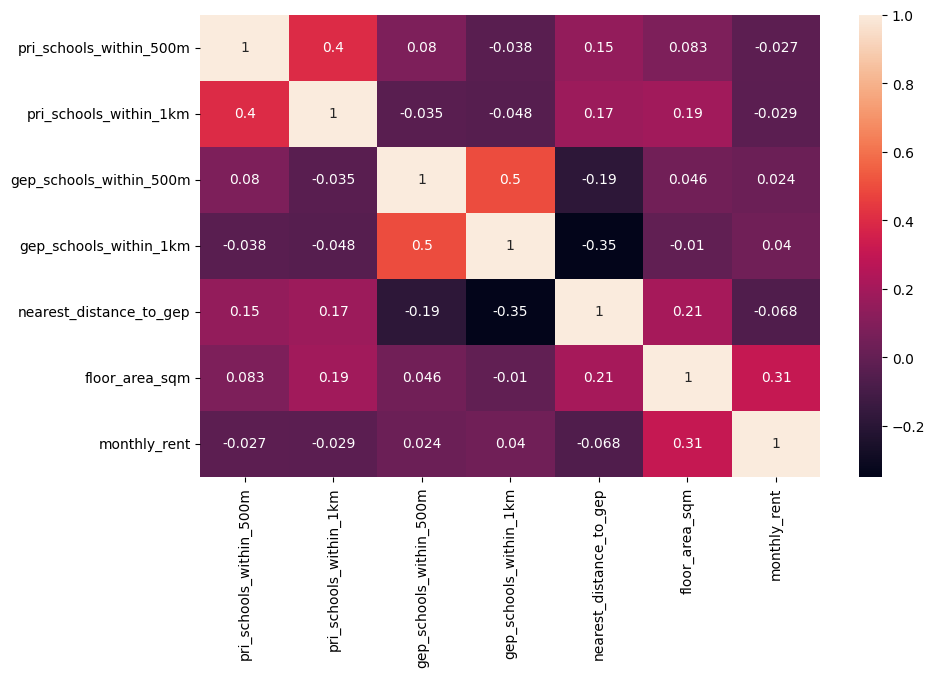

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = df_training[['pri_schools_within_500m', 'pri_schools_within_1km', 
                   'gep_schools_within_500m', 'gep_schools_within_1km', 
                   'nearest_distance_to_gep',
                   "floor_area_sqm", "monthly_rent"]].corr()

plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot=True)

In [60]:
sch_distances, _ = sch_tree.query(training_coords, k=1)  # k=1 for finding the nearest point
df_training['nearest_distance_to_sch'] = sch_distances
df_training.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,planning_area,region,monthly_rent,pri_schools_within_500m,gep_schools_wi|thin_500m,gep_schools_within_500m,gep_schools_within_1km,pri_schools_within_1km,nearest_distance_to_gep,nearest_distance_to_sch
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,jurong east,west region,1600,1,0,0,0,3,3753.259361,334.501363
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,bedok,east region,2250,0,0,0,0,5,2167.360316,605.548110
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,toa payoh,central region,1900,1,0,0,0,2,1897.242758,426.187835
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,pasir ris,east region,2850,0,0,0,0,3,3753.937855,562.390332
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,kallang,central region,2100,1,0,0,0,2,3095.238252,271.506145


<Axes: >

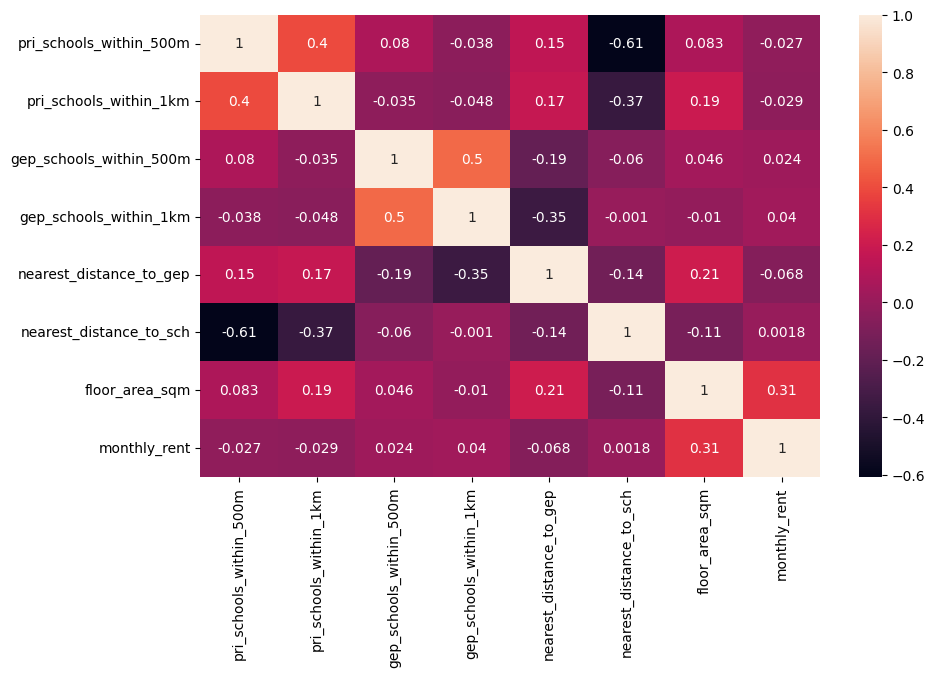

In [61]:
cor = df_training[['pri_schools_within_500m', 'pri_schools_within_1km', 
                   'gep_schools_within_500m', 'gep_schools_within_1km', 
                   'nearest_distance_to_gep', 'nearest_distance_to_sch',
                   "floor_area_sqm", "monthly_rent"]].corr()

plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot=True)